# lab - 3

тут була помилка - див. lab_3_2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# Вихідні дані (Ваш варіант 7: Алюміній)
a = 84.18e-6  # м²/с
L = 0.02      # м
T_total = 0.1 * 3600  # год -> сек
N = 100
h = 0.0075    # Попередній нестабільний, перевіримо
dx = L / (N + 1)  # Просторовий крок

In [51]:
# Максимальний стабільний крок часу
h_max = dx**2 / (2 * a)
h = 10 * h_max  # Збільшено до 99%

In [52]:
# Оцінка кількості кроків
time_steps = int(T_total / h)
print(f"Обраний часовий крок: h={h:.5e} с")
print(f"Загальна кількість кроків: {time_steps}")

Обраний часовий крок: h=2.32905e-03 с
Загальна кількість кроків: 154569


In [53]:
# Початковий розподіл температури
T = np.zeros(N+2)
T[0] = 7
T[-1] = 26

In [54]:
# Функція рівняння теплопровідності
def heat_equation(t, T):
  dTdt = np.zeros_like(T)
  for i in range(1, N+1):
    dTdt[i] = a * (T[i+1] - 2*T[i] + T[i-1]) / dx**2
  return dTdt

In [55]:
# Метод Рунге-Кутта 4-го порядку
def runge_kutta(T, h, T_total):
  t = 0
  time_steps = int(T_total / h)
  results = [T.copy()]
  
  for step in range(time_steps):
    k1 = h * heat_equation(t, T)
    k2 = h * heat_equation(t + h/2, T + k1/2)
    k3 = h * heat_equation(t + h/2, T + k2/2)
    k4 = h * heat_equation(t + h, T + k3)
    
    T += (k1 + 2*k2 + 2*k3 + k4) / 6
    results.append(T.copy())

    t += h

  return np.array(results)

In [ ]:
T_results = runge_kutta(T, h, T_total)

C:\Users\Omen\AppData\Local\Temp\ipykernel_22232\2431265413.py:5: RuntimeWarning: overflow encountered in double_scalars
  dTdt[i] = a * (T[i+1] - 2*T[i] + T[i-1]) / dx**2
C:\Users\Omen\AppData\Local\Temp\ipykernel_22232\3200422627.py:9: RuntimeWarning: invalid value encountered in add
  k2 = h * heat_equation(t + h/2, T + k1/2)
C:\Users\Omen\AppData\Local\Temp\ipykernel_22232\3200422627.py:13: RuntimeWarning: invalid value encountered in add
  T += (k1 + 2*k2 + 2*k3 + k4) / 6
C:\Users\Omen\AppData\Local\Temp\ipykernel_22232\2431265413.py:5: RuntimeWarning: invalid value encountered in double_scalars
  dTdt[i] = a * (T[i+1] - 2*T[i] + T[i-1]) / dx**2


In [59]:
T_results[0]

array([ 7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 26.])

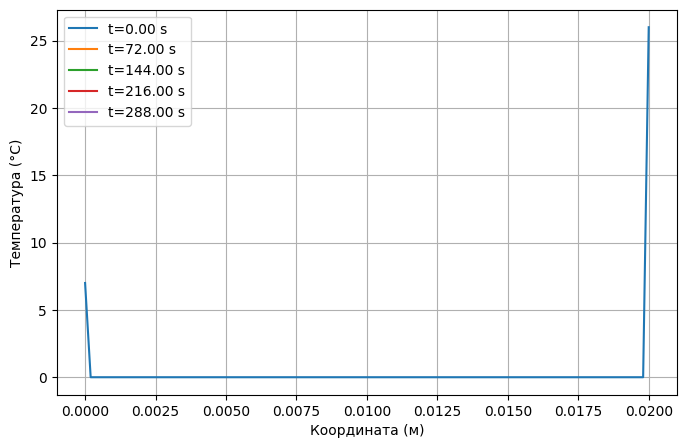

In [57]:
# Візуалізація
plt.figure(figsize=(8,5))
for i in range(0, len(T_results), len(T_results)//5):
  plt.plot(np.linspace(0, L, N+2), T_results[i], label=f't={i*h:.2f} s')
plt.xlabel('Координата (м)')
plt.ylabel('Температура (°C)')
plt.legend()
plt.grid()
plt.show()